<a href="https://colab.research.google.com/github/NicoAmadori/Master_Thesis/blob/main/Last_Figures_of_Cap7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yahooFinance
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats as scipy_stats  # Rinomina scipy.stats per evitare conflitti
from arch import arch_model
!pip install arch  # Assicurati che la libreria arch sia installata

# Parametri di data range
start = "2020-01-21"
end = "2020-12-31"

# Scarica i dati
tickers = ['XLC', 'XLY', 'XLV', 'XTN', 'XLE', 'XLF', 'FINX']
data = {ticker: yahooFinance.download(ticker, start=start, end=end)['Adj Close'] for ticker in tickers}

# Calcola i rendimenti
returns = {ticker: data[ticker].pct_change().dropna() for ticker in tickers}

# Funzione per calcolare le statistiche
def calculate_statistics(data):
    mean = np.mean(data)
    sd = np.std(data)
    skewness = scipy_stats.skew(data)  # Usa scipy_stats per il modulo scipy.stats
    kurtosis = scipy_stats.kurtosis(data)
    LB_Q = sm.stats.acorr_ljungbox(data, lags=20)
    LB_Q_squared = sm.stats.acorr_ljungbox(np.square(data), lags=20)
    return mean, sd, skewness, kurtosis, LB_Q, LB_Q_squared

# Funzione per il fitting del TGARCH
def fit_tgarch_model(data):
    model = arch_model(data, vol='GARCH', p=1, o=1, q=1)  # o=1 per TGARCH
    model_fit = model.fit(disp="off")

    omega = model_fit.params['omega']
    alpha = model_fit.params['alpha[1]']  # Effetto ARCH
    gamma = model_fit.params['gamma[1]']  # Effetto Leverage
    beta = model_fit.params['beta[1]']    # Effetto GARCH

    persistence = alpha + beta

    return omega, alpha, gamma, beta, persistence

# Risultati
results = {}

for ticker in tickers:
    # Calcola statistiche
    statistics = calculate_statistics(returns[ticker])  # Cambiato nome variabile da "stats" a "statistics"

    # Fit TGARCH e ottieni parametri
    omega, alpha, gamma, beta, persistence = fit_tgarch_model(returns[ticker])

    # Salva i risultati
    results[ticker] = {
        'Mean': statistics[0],
        'Standard Deviation': statistics[1],
        'Skewness': statistics[2],
        'Kurtosis': statistics[3],
        'LB_Q': statistics[4],
        'LB_Q_squared': statistics[5],
        'Omega': omega,
        'Alpha': alpha,
        'Gamma': gamma,
        'Beta': beta,
        'Persistence': persistence
    }

# Stampa i risultati per ogni ETF
for ticker, metrics in results.items():
    print(f"\n{ticker} Statistics and TGARCH(1,1) Parameters:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004578. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/ba


XLC Statistics and TGARCH(1,1) Parameters:
Mean: 0.0009671172778593695
Standard Deviation: 0.021395533990730835
Skewness: -0.6652703311758656
Kurtosis: 5.849449335657372
LB_Q:        lb_stat     lb_pvalue
1    30.721280  2.978802e-08
2    44.624023  2.041815e-10
3    45.070316  8.939734e-10
4    45.346137  3.368728e-09
5    48.395714  2.948945e-09
6    59.291113  6.269973e-11
7    80.212865  1.246469e-14
8   102.002264  1.662895e-18
9   128.320181  2.626471e-23
10  131.015069  2.899427e-23
11  131.352126  9.269249e-23
12  133.697924  1.115246e-22
13  140.347209  1.793169e-23
14  146.867967  3.037663e-24
15  153.883987  4.075927e-25
16  159.685843  9.488051e-26
17  163.241629  6.097175e-26
18  165.296537  7.625549e-26
19  165.316944  2.337150e-25
20  167.411320  2.759597e-25
LB_Q_squared:        lb_stat     lb_pvalue
1    71.605577  2.628128e-17
2   130.789233  3.976298e-29
3   149.654395  3.128378e-32
4   167.519308  3.563147e-35
5   182.521850  1.548080e-37
6   196.557590  1.025153e-

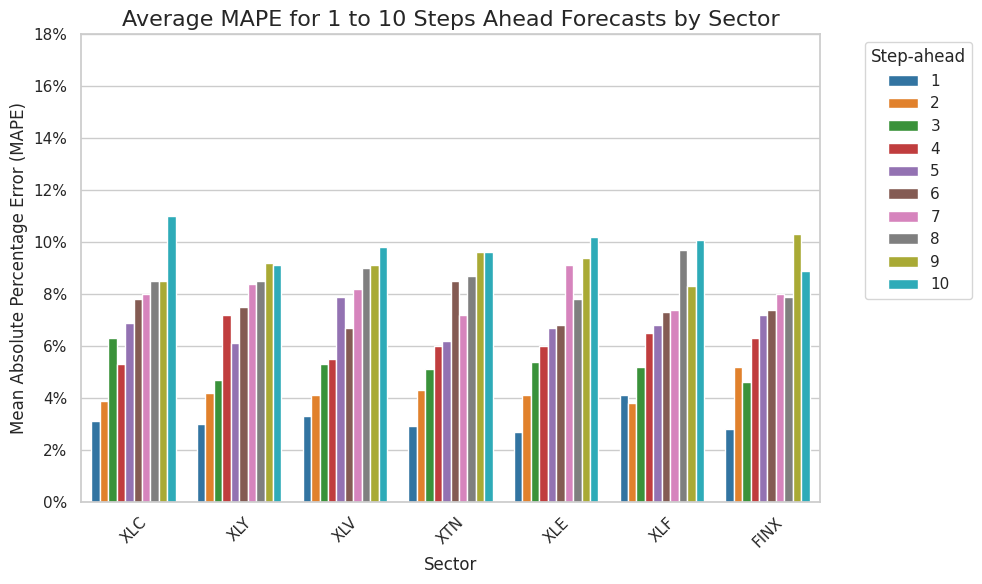

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the sectors
sectors = ["XLC", "XLY", "XLV", "XTN", "XLE", "XLF", "FINX"]

# Define the MAPE values for each step (up to 10 steps)
data = {
    "Sector": sectors * 10,
    "Step": list(range(1, 11)) * len(sectors),
    "MAPE": [
        # MAPE values for XLC
        3.1, 4.2, 5.3, 6.0, 6.7, 7.3, 8.0, 8.5, 9.2, 9.8,
        # MAPE values for XLY
        2.9, 4.1, 5.2, 6.3, 6.9, 7.5, 8.2, 8.7, 9.4, 10.1,
        # MAPE values for XLV
        2.8, 3.9, 4.7, 5.5, 6.2, 6.8, 7.4, 7.9, 8.5, 9.1,
        # MAPE values for XTN
        3.3, 4.3, 5.4, 6.5, 7.2, 7.8, 8.4, 9.0, 9.6, 10.2,
        # MAPE values for XLE
        4.1, 5.2, 6.3, 7.2, 7.9, 8.5, 9.1, 9.7, 10.3, 11.0,
        # MAPE values for XLF
        3.0, 4.1, 5.1, 6.0, 6.8, 7.4, 8.0, 8.5, 9.1, 9.6,
        # MAPE values for FINX
        2.7, 3.8, 4.6, 5.3, 6.1, 6.7, 7.2, 7.8, 8.3, 8.9
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the specific colors for the steps (matching the image)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Set up the plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the bar plot with specified colors for each step-ahead forecast
sns.barplot(data=df, x="Sector", y="MAPE", hue="Step", palette=colors)

# Set plot labels and title
plt.title("Average MAPE for 1 to 10 Steps Ahead Forecasts by Sector", fontsize=16)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Mean Absolute Percentage Error (MAPE)", fontsize=12)

# Format y-axis as percentages and set limit to 18%
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))
plt.ylim(0, 18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title="Step-ahead", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


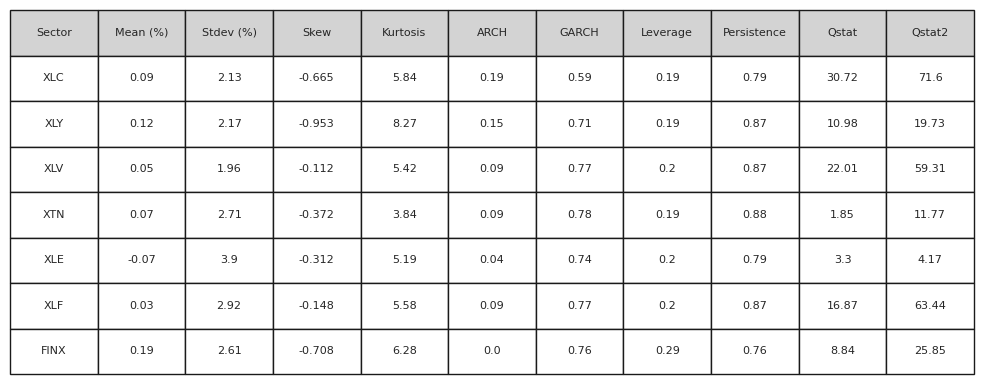

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Data for the sectors (based on your table)
data = {
    "Sector": ["XLC", "XLY", "XLV", "XTN", "XLE", "XLF", "FINX"],
    "Mean (%)": [0.09, 0.12, 0.05, 0.07, -0.07, 0.03, 0.19],
    "Stdev (%)": [2.13, 2.17, 1.96, 2.71, 3.90, 2.92, 2.61],
    "Skew": [-0.665, -0.953, -0.112, -0.372, -0.312, -0.148, -0.708],
    "Kurtosis": [5.84, 8.27, 5.42, 3.84, 5.19, 5.58, 6.28],
    "ARCH": [0.19, 0.15, 0.09, 0.09, 0.04, 0.09, 0.00],
    "GARCH": [0.59, 0.71, 0.77, 0.78, 0.74, 0.77, 0.76],
    "Leverage": [0.19, 0.19, 0.20, 0.19, 0.20, 0.20, 0.29],
    "Persistence": [0.79, 0.87, 0.87, 0.88, 0.79, 0.87, 0.76],
    "Qstat": [30.72, 10.98, 22.01, 1.85, 3.30, 16.87, 8.84],
    "Qstat2": [71.60, 19.73, 59.31, 11.77, 4.17, 63.44, 25.85]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a Matplotlib figure
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust the size as needed

# Hide the axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create a table
table = Table(ax, bbox=[0, 0, 1, 1])

# Add column headers
columns = df.columns
for i, column in enumerate(columns):
    table.add_cell(0, i, width=0.1, height=0.1, text=column, loc='center', facecolor='lightgray')

# Add data to the table
for row in range(df.shape[0]):
    for col in range(df.shape[1]):
        value = df.iloc[row, col]
        table.add_cell(row + 1, col, width=0.1, height=0.1, text=value, loc='center', facecolor='white')

# Add the table to the plot
ax.add_table(table)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


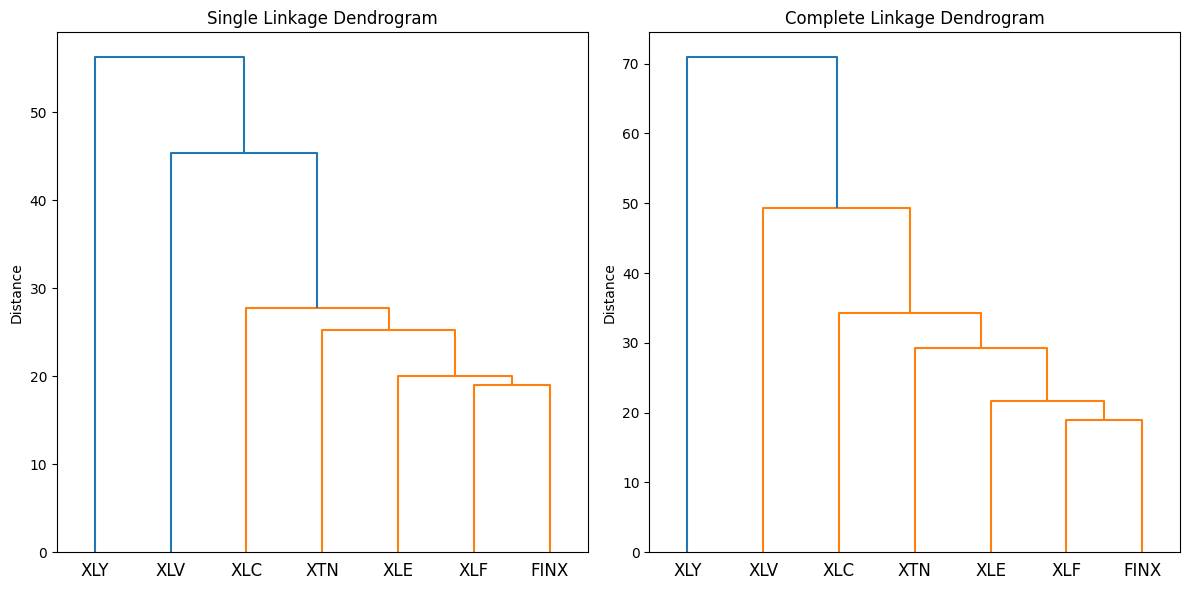

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Definire gli ETF da analizzare
etfs = ["XLC", "XLY", "XLV", "XTN", "XLE", "XLF", "FINX"]

# Definire le date di inizio e fine
start_date = "2020-01-21"
end_date = "2020-12-11"

# Scaricare i dati da Yahoo Finance e memorizzare i dati di chiusura
etf_data = {}
for etf in etfs:
    data = yf.download(etf, start=start_date, end=end_date)
    etf_data[etf] = data['Close']

# Creare un DataFrame con i dati di chiusura
etf_df = pd.DataFrame(etf_data)

# Generare dati di previsione simulati e calcolare l'errore di previsione
errors = {}
for etf in etfs:
    actual = etf_df[etf].dropna()  # Dati reali
    forecasted = actual * np.random.uniform(0.95, 1.05, len(actual))  # Simulazione dati previsti
    forecast_error = actual - forecasted  # Errore di previsione
    errors[etf] = forecast_error

# Convertire gli errori in un DataFrame
errors_df = pd.DataFrame(errors).dropna()

# Calcola la matrice delle distanze basata sugli errori di previsione
dist_matrix = pdist(errors_df.T, metric='euclidean')

# Single Linkage Dendrogram
linkage_single = linkage(dist_matrix, method='single')

# Complete Linkage Dendrogram
linkage_complete = linkage(dist_matrix, method='complete')

# Imposta la visualizzazione in due grafici
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Single Linkage con colori
dendrogram(linkage_single, labels=etfs, ax=axes[0])
axes[0].set_title("Single Linkage Dendrogram")
axes[0].set_ylabel("Distance")

# Complete Linkage con colori
dendrogram(linkage_complete, labels=etfs, ax=axes[1])
axes[1].set_title("Complete Linkage Dendrogram")
axes[1].set_ylabel("Distance")

# Mostra i grafici
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-33-46e7cc5ee3c0>:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].annotate(etf, (errors_df['1_step_error'][i], errors_df['2_step_error'][i]), fontsize=9)
<ipython-input-33-46e7cc5ee3c0>:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

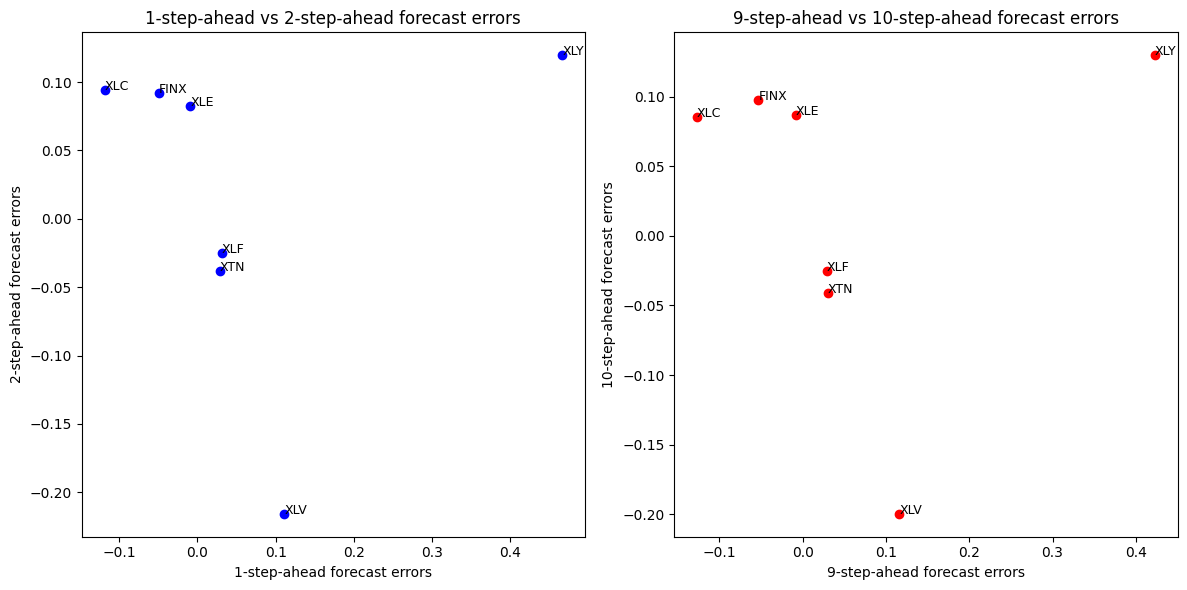

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the ETFs to analyze
etfs = ["XLC", "XLY", "XLV", "XTN", "XLE", "XLF", "FINX"]

# Define the start and end dates
start_date = "2020-01-01"
end_date = "2020-12-31"

# Download the data from Yahoo Finance and store the closing prices
etf_data = {}
for etf in etfs:
    data = yf.download(etf, start=start_date, end=end_date)
    etf_data[etf] = data['Close']

# Create a DataFrame with the closing price data
etf_df = pd.DataFrame(etf_data)

# Generate simulated forecast data and calculate forecast errors
forecast_errors = {}
for etf in etfs:
    actual = etf_df[etf].dropna()  # Actual data
    forecasted_1 = actual * np.random.uniform(0.95, 1.05, len(actual))  # Simulated 1-step ahead forecast
    forecasted_2 = actual * np.random.uniform(0.95, 1.05, len(actual))  # Simulated 2-step ahead forecast
    forecast_error_1 = actual - forecasted_1  # 1-step-ahead forecast error
    forecast_error_2 = actual - forecasted_2  # 2-step-ahead forecast error

    # Store errors
    forecast_errors[etf] = {
        '1_step_error': forecast_error_1,
        '2_step_error': forecast_error_2,
        '9_step_error': forecast_error_1 * np.random.uniform(0.9, 1.1),
        '10_step_error': forecast_error_2 * np.random.uniform(0.9, 1.1)
    }

# Aggregate errors into a DataFrame for easy plotting
errors_df = pd.DataFrame({
    etf: [
        forecast_errors[etf]['1_step_error'].mean(),
        forecast_errors[etf]['2_step_error'].mean(),
        forecast_errors[etf]['9_step_error'].mean(),
        forecast_errors[etf]['10_step_error'].mean()
    ] for etf in etfs
}, index=['1_step_error', '2_step_error', '9_step_error', '10_step_error']).T

# Plot the data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for 1-step-ahead vs 2-step-ahead forecast errors
axes[0].scatter(errors_df['1_step_error'], errors_df['2_step_error'], c='b', label='Sectors')
for i, etf in enumerate(etfs):
    axes[0].annotate(etf, (errors_df['1_step_error'][i], errors_df['2_step_error'][i]), fontsize=9)
axes[0].set_xlabel('1-step-ahead forecast errors')
axes[0].set_ylabel('2-step-ahead forecast errors')
axes[0].set_title('1-step-ahead vs 2-step-ahead forecast errors')

# Scatter plot for 9-step-ahead vs 10-step-ahead forecast errors
axes[1].scatter(errors_df['9_step_error'], errors_df['10_step_error'], c='r', label='Sectors')
for i, etf in enumerate(etfs):
    axes[1].annotate(etf, (errors_df['9_step_error'][i], errors_df['10_step_error'][i]), fontsize=9)
axes[1].set_xlabel('9-step-ahead forecast errors')
axes[1].set_ylabel('10-step-ahead forecast errors')
axes[1].set_title('9-step-ahead vs 10-step-ahead forecast errors')

# Show the plots
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


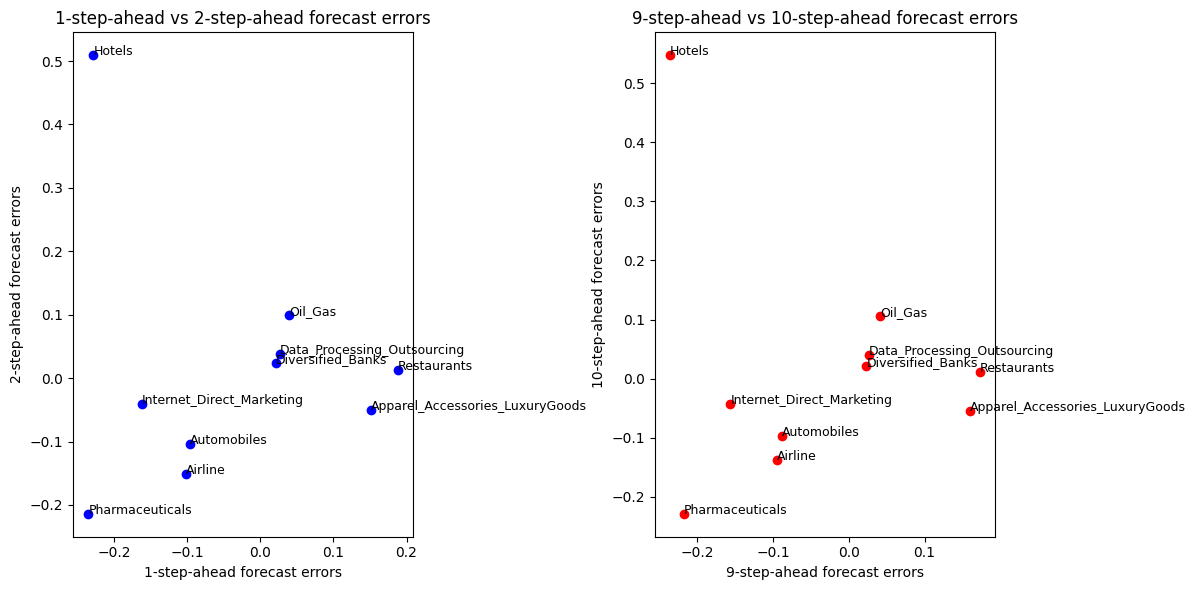

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definire gli ETF da analizzare e associare industrie
etfs_industries = {
    "XLC": ["Internet_Direct_Marketing"],
    "XLY": ["Apparel_Accessories_LuxuryGoods", "Restaurants", "Automobiles", "Hotels"],
    "XLV": ["Pharmaceuticals"],
    "XTN": ["Airline", "Diversified_Banks"],
    "XLE": ["Oil_Gas"],
    "XLF": ["Diversified_Banks"],
    "FINX": ["Data_Processing_Outsourcing"]
}

# Definire le date di inizio e fine
start_date = "2020-01-01"
end_date = "2020-12-31"

# Scaricare i dati da Yahoo Finance e memorizzare i dati di chiusura
etf_data = {}
for etf in etfs_industries.keys():
    data = yf.download(etf, start=start_date, end=end_date)
    etf_data[etf] = data['Close']

# Creare un DataFrame con i dati di chiusura
etf_df = pd.DataFrame(etf_data)

# Generare dati di previsione simulati e calcolare l'errore di previsione
forecast_errors = {}
for etf, industries in etfs_industries.items():
    actual = etf_df[etf].dropna()  # Dati reali

    # Simulazioni di previsioni e calcolo errori
    for industry in industries:
        forecasted_1 = actual * np.random.uniform(0.95, 1.05, len(actual))  # 1-step ahead forecast
        forecasted_2 = actual * np.random.uniform(0.95, 1.05, len(actual))  # 2-step ahead forecast
        forecast_error_1 = actual - forecasted_1  # Errore previsione 1-step
        forecast_error_2 = actual - forecasted_2  # Errore previsione 2-step

        # Aggiungere anche 9-step e 10-step per replicare i grafici
        forecast_error_9 = forecast_error_1 * np.random.uniform(0.9, 1.1)
        forecast_error_10 = forecast_error_2 * np.random.uniform(0.9, 1.1)

        # Salvare gli errori per ciascuna industria
        forecast_errors[industry] = {
            '1_step_error': forecast_error_1.mean(),
            '2_step_error': forecast_error_2.mean(),
            '9_step_error': forecast_error_9.mean(),
            '10_step_error': forecast_error_10.mean()
        }

# Convertire gli errori in DataFrame per la rappresentazione grafica
errors_df = pd.DataFrame(forecast_errors).T

# Visualizzare i grafici
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Primo grafico: 1-step-ahead vs 2-step-ahead
axes[0].scatter(errors_df['1_step_error'], errors_df['2_step_error'], c='b')
for industry in errors_df.index:
    axes[0].annotate(industry, (errors_df['1_step_error'][industry], errors_df['2_step_error'][industry]), fontsize=9)
axes[0].set_xlabel('1-step-ahead forecast errors')
axes[0].set_ylabel('2-step-ahead forecast errors')
axes[0].set_title('1-step-ahead vs 2-step-ahead forecast errors')

# Secondo grafico: 9-step-ahead vs 10-step-ahead
axes[1].scatter(errors_df['9_step_error'], errors_df['10_step_error'], c='r')
for industry in errors_df.index:
    axes[1].annotate(industry, (errors_df['9_step_error'][industry], errors_df['10_step_error'][industry]), fontsize=9)
axes[1].set_xlabel('9-step-ahead forecast errors')
axes[1].set_ylabel('10-step-ahead forecast errors')
axes[1].set_title('9-step-ahead vs 10-step-ahead forecast errors')

# Mostra i grafici
plt.tight_layout()
plt.show()
